# Proyecto

### Autores:
    Josue Arrieta Alfaro (no me acuerdo)
    Luis Felipe Cubero Vargas


El siguiente documento es una análisis de una base de datos de mineria en donde se trata de predecir el porcentaje de Silicio de un material al final del proceso, en donde se busca que este porcentaje sea menor de 0.25% por tanto ante nuevos casos se puede predecir cuando una pieza de material necesita ser revisada

In [155]:
import pandas as pd
import numpy as np

In [156]:
pd.set_option('display.max_columns', 30)

In [157]:
data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

In [158]:
data.shape

(737453, 24)

In [159]:
data.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [160]:
data.head(10)

date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   
5  2017-03-10 01:00:00        55,2         16,98      3079,1    564,697   
6  2017-03-10 01:00:00        55,2         16,98     3127,79    566,467   
7  2017-03-10 01:00:00        55,2         16,98     3152,93    558,777   
8  2017-03-10 01:00:00        55,2         16,98     3147,27     556,03   
9  2017-03-10 01:00:00        55,2         16,98     3142,58    565,857   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   
5       396,533     10,0705             1,74                       250,73   
6         392,9     10,0713             1,74                      250,313   
7       397,002     10,0722             1,74                      249,895   
8       394,307      10,073             1,74                      250,137   
9       393,105     10,0738             1,74                      249,653   

  Flotation Column 02 Air Flow Flotation Column 03 Air Flow  \
0                      253,235                      250,576   
1                      250,532                      250,862   
2                      247,874                      250,313   
3                      254,487                      250,049   
4                      252,136                      249,895   
5                      248,906                      249,521   
6                      252,202                      249,082   
7                       253,63                      249,258   
8                      251,104                      248,774   
9                      252,202                      248,203   

  Flotation Column 04 Air Flow Flotation Column 05 Air Flow  \
0                      295,096                        306,4   
1                      295,096                        306,4   
2                      295,096                        306,4   
3                      295,096                        306,4   
4                      295,096                        306,4   
5                      295,096                        306,4   
6                      295,096                        306,4   
7                      295,096                        306,4   
8                      295,096                        306,4   
9                      295,096                        306,4   

  Flotation Column 06 Air Flow Flotation Column 07 Air Flow  \
0                      250,225                      250,884   
1                      250,137                      248,994   
2                      251,345                      248,071   
3                      250,422                      251,147   
4                      249,983                      248,928   
5                      250,356                      251,873   
6                       250,95                      253,477   
7                      249,456                      253,345   
8                      248,577                      250,884   
9                      248,511                      248,137   

  Flotation Column 01 Level Flotation Column 02 Level  \
0                   457,396                   432,962   
1                   451,891                    429,56   
2                    451,24                   468,927   
3                   452,441       

In [161]:
data.dtypes

date                            object
% Iron Feed                     object
% Silica Feed                   object
Starch Flow                     object
Amina Flow                      object
Ore Pulp Flow                   object
Ore Pulp pH                     object
Ore Pulp Density                object
Flotation Column 01 Air Flow    object
Flotation Column 02 Air Flow    object
Flotation Column 03 Air Flow    object
Flotation Column 04 Air Flow    object
Flotation Column 05 Air Flow    object
Flotation Column 06 Air Flow    object
Flotation Column 07 Air Flow    object
Flotation Column 01 Level       object
Flotation Column 02 Level       object
Flotation Column 03 Level       object
Flotation Column 04 Level       object
Flotation Column 05 Level       object
Flotation Column 06 Level       object
Flotation Column 07 Level       object
% Iron Concentrate              object
% Silica Concentrate            object
dtype: object

Dado que todos son de tipo objeto es necesario cambiarlos a tipo flotante, es lo que se realizara a continuación para todas las columns exceptuando el date


In [162]:
for col in cols[1:]: data[col] = data[col].str.replace(',','.')

data[cols[1:]] = data[cols[1:]].astype(float)

In [163]:
data.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [164]:
data.head(10)

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   
5  2017-03-10 01:00:00         55.2          16.98      3079.10     564.697   
6  2017-03-10 01:00:00         55.2          16.98      3127.79     566.467   
7  2017-03-10 01:00:00         55.2          16.98      3152.93     558.777   
8  2017-03-10 01:00:00         55.2          16.98      3147.27     556.030   
9  2017-03-10 01:00:00         55.2          16.98      3142.58     565.857   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   
5        396.533      10.0705              1.74                       250.730   
6        392.900      10.0713              1.74                       250.313   
7        397.002      10.0722              1.74                       249.895   
8        394.307      10.0730              1.74                       250.137   
9        393.105      10.0738              1.74                       249.653   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  \
0                       253.235                       250.576   
1                       250.532                       250.862   
2                       247.874                       250.313   
3                       254.487                       250.049   
4                       252.136                       249.895   
5                       248.906                       249.521   
6                       252.202                       249.082   
7                       253.630                       249.258   
8                       251.104                       248.774   
9                       252.202                       248.203   

   Flotation Column 04 Air Flow  Flotation Column 05 Air Flow  \
0                       295.096                         306.4   
1                       295.096                         306.4   
2                       295.096                         306.4   
3                       295.096                         306.4   
4                       295.096                         306.4   
5                       295.096                         306.4   
6                       295.096                         306.4   
7                       295.096                         306.4   
8                       295.096                         306.4   
9                       295.096                         306.4   

   Flotation Column 06 Air Flow  Flotation Column 07 Air Flow  \
0                       250.225                       250.884   
1                       250.137                       248.994   
2                       251.345                       248.071   
3                       250.422                       251.147   
4                       249.983                       248.928   
5                       250.356                       251.873   
6                       250.950                       253.477   
7                       249.456                       253.345   
8                       248.577                       250.884   
9                       248.511                       248.137   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                    457.396                    4

In [165]:
data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

Dado que no existen valores perdidos. Queda pendiente dos cosas, el primero es eda y el siguiente es una estandarización de los datos, en especial para el proceso de construcción de la red neurnal 

## EDA

In [166]:
cols = data.columns.tolist()
cols

['date',
 '% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate']

In [167]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[cols[1:]] = scaler.fit_transform(data[cols[1:]].to_numpy())
# scaler.fit_transform(data['% Iron Concentrate'].to_numpy())

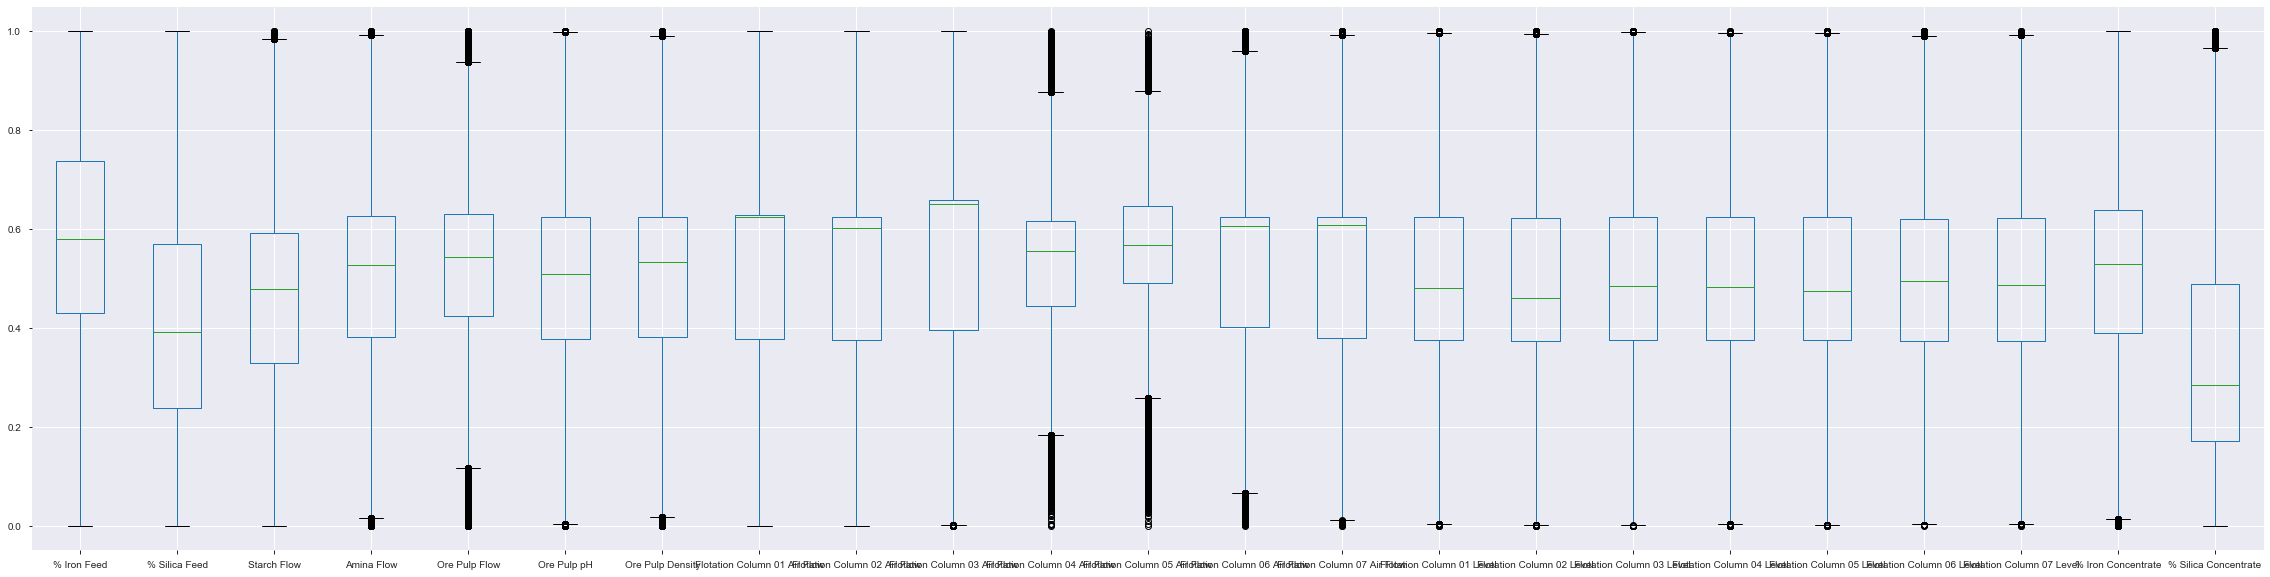

In [236]:
data.boxplot(figsize = (40,10))

In [169]:
data[cols[1:]].corr()

% Iron Feed  % Silica Feed  Starch Flow  \
% Iron Feed                      1.000000      -0.971833     0.027981   
% Silica Feed                   -0.971833       1.000000    -0.016073   
Starch Flow                      0.027981      -0.016073     1.000000   
Amina Flow                      -0.088148       0.078735     0.254748   
Ore Pulp Flow                    0.160705      -0.150788     0.042703   
Ore Pulp pH                      0.007451       0.008014     0.263020   
Ore Pulp Density                -0.125518       0.104497     0.226004   
Flotation Column 01 Air Flow    -0.062379       0.091757     0.191131   
Flotation Column 02 Air Flow    -0.169430       0.182573     0.186585   
Flotation Column 03 Air Flow    -0.062207       0.084197     0.183288   
Flotation Column 04 Air Flow    -0.137413       0.160880     0.093520   
Flotation Column 05 Air Flow     0.121035      -0.130210    -0.088245   
Flotation Column 06 Air Flow    -0.042531       0.067565     0.215780   
Flotation Column 07 Air Flow    -0.016356       0.045300     0.194786   
Flotation Column 01 Level        0.029499      -0.038291    -0.294380   
Flotation Column 02 Level        0.020839      -0.036968    -0.278422   
Flotation Column 03 Level        0.015191      -0.022675    -0.301757   
Flotation Column 04 Level        0.016108      -0.034050    -0.012612   
Flotation Column 05 Level        0.023288      -0.043753    -0.055528   
Flotation Column 06 Level        0.003694      -0.019502    -0.071722   
Flotation Column 07 Level        0.025723      -0.046413    -0.038193   
% Iron Concentrate               0.055424      -0.044168     0.069657   
% Silica Concentrate            -0.077052       0.072724    -0.066394   

                              Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
% Iron Feed                    -0.088148       0.160705     0.007451   
% Silica Feed                   0.078735      -0.150788     0.008014   
Starch Flow                     0.254748       0.042703     0.263020   
Amina Flow                      1.000000       0.212252     0.123690   
Ore Pulp Flow                   0.212252       1.000000     0.118376   
Ore Pulp pH                     0.123690       0.118376     1.000000   
Ore Pulp Density                0.655788       0.012279     0.115189   
Flotation Column 01 Air Flow    0.111321      -0.137866     0.163073   
Flotation Column 02 Air Flow    0.122911      -0.118549     0.144935   
Flotation Column 03 Air Flow    0.101957      -0.140761     0.193372   
Flotation Column 04 Air Flow    0.016080      -0.155990     0.150173   
Flotation Column 05 Air Flow   -0.044029       0.166989    -0.139464   
Flotation Column 06 Air Flow    0.119966      -0.159255     0.113741   
Flotation Column 07 Air Flow    0.079558      -0.140914     0.174684   
Flotation Column 01 Level      -0.268536      -0.008579    -0.165739   
Flotation Column 02 Level      -0.234454      -0.008049    -0.153557   
Flotation Column 03 Level      -0.286968      -0.054351    -0.140070   
Flotation Column 04 Level      -0.180301      -0.009784     0.046371   
Flotation Column 05 Level      -0.211712       0.002260     0.013041   
Flotation Column 06 Level      -0.197758      -0.016661    -0.075034   
Flotation Column 07 Level      -0.168050       0.016585     0.019021   
% Iron Concentrate             -0.110148       0.083120     0.192992   
% Silica Concentrate            0.156701       0.008222    -0.147739   

                              Ore Pulp Density  Flotation Column 01 Air Flow  \
% Iron Feed                          -0.125518                     -0.062379   
% Silica Feed                         0.104497                      0.091757   
Starch Flow                           0.226004                      0.191131   
Amina Flow                            0.655788                      0.111321   
Ore Pulp Flow                         0.012279                     -0.137866   
Ore Pulp pH                           0.115189                      

In [58]:
c = data[1:].corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so

Ore Pulp Flow                 Flotation Column 05 Level       0.002260
Flotation Column 05 Level     Ore Pulp Flow                   0.002260
Flotation Column 07 Air Flow  % Iron Concentrate              0.002444
% Iron Concentrate            Flotation Column 07 Air Flow    0.002444
% Iron Feed                   Flotation Column 06 Level       0.003694
Flotation Column 06 Level     % Iron Feed                     0.003694
% Silica Concentrate          Flotation Column 04 Air Flow    0.005013
Flotation Column 04 Air Flow  % Silica Concentrate            0.005013
Ore Pulp Density              Flotation Column 01 Air Flow    0.005141
Flotation Column 01 Air Flow  Ore Pulp Density                0.005141
Flotation Column 05 Air Flow  Flotation Column 04 Level       0.006792
Flotation Column 04 Level     Flotation Column 05 Air Flow    0.006792
Ore Pulp pH                   % Iron Feed                     0.007451
% Iron Feed                   Ore Pulp pH                     0.007451
Ore Pu

Lo anterior es importante dado que nos permite observar la correlación entre las variables del dataset, correlaciones muy altas mayor de 0.9 son a tener en cuidado en el sentido de que podriamos ester teniendo la misma variable medida o incluida una dentro de la otra, lo cuals nos permite tener la opción de realizar un PCA para reducir la dimensionalidad 

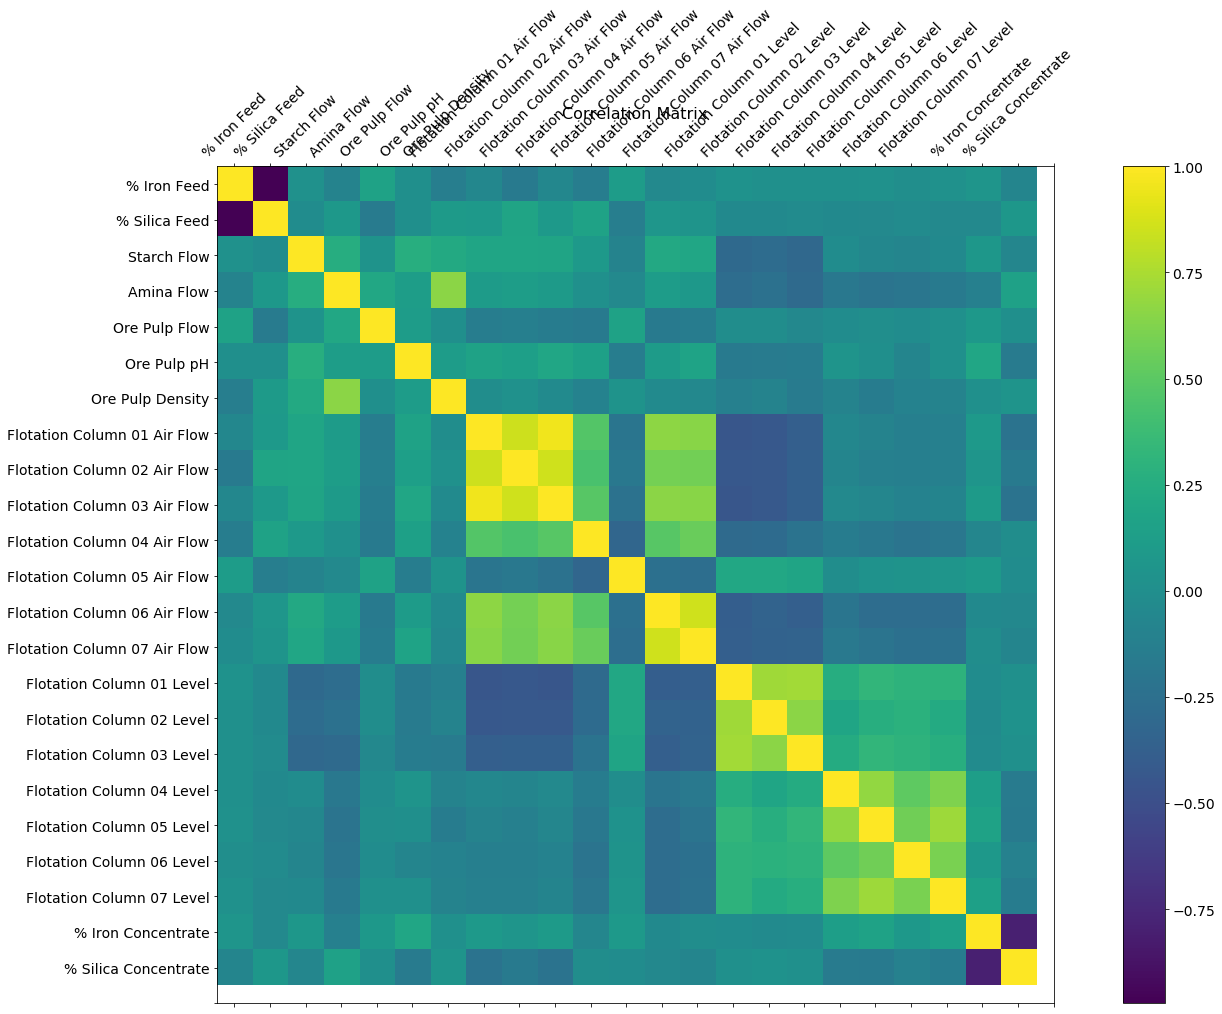

In [48]:
f = plt.figure(figsize=(25, 15))
plt.matshow(data[cols[1:]].corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns[1:], fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns[1:], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [171]:
features = data[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate']]
label = data['% Silica Concentrate']


In [89]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label, random_state=13)

In [115]:
X_train.shape

(553089, 22)

In [209]:
from sklearn.decomposition import PCA
componentes = 10
pca = PCA(n_components = componentes)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [210]:
pca.fit_transform(X_train)
pca.transform(X_test)

array([[ 0.69233423, -0.00438154, -0.35151681, ..., -0.30330996,
         0.04377323, -0.07079187],
       [ 0.28787785, -0.29986294,  0.29724871, ..., -0.1619591 ,
        -0.03521158,  0.09348325],
       [-0.44658204,  0.30919101, -0.03260929, ...,  0.13692501,
         0.1737669 ,  0.00782262],
       ...,
       [ 0.38502162,  0.12747248, -0.50143099, ..., -0.2113325 ,
        -0.07202915, -0.03794017],
       [-0.32363365,  0.21566068,  0.05444627, ..., -0.03054299,
        -0.06039144,  0.0974964 ],
       [-0.41830893,  0.27173659, -0.40389504, ..., -0.31402372,
        -0.17675607,  0.07774487]])

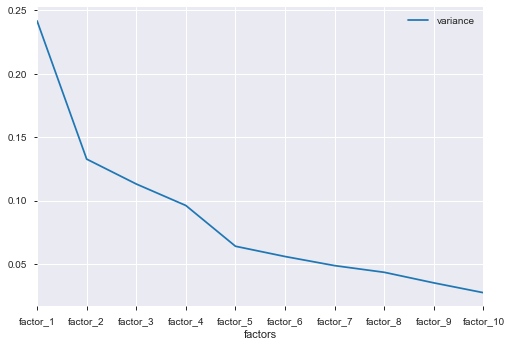

In [211]:
explained_variance = pca.explained_variance_ratio_
d = pd.DataFrame({'factors':['factor_'+str(n+1) for n in range(componentes)],'variance':explained_variance})
d.plot.line(x = 'factors')

A partir de lo anterior se puede observar que los factores no son capaces de explicar más del 24% de la varianza de los componentes que se asocian para cada factor no obstante si se realiza para dos factores que son los que más logran agrupar capturar la varianza del dataset entonces se puede ver que a su vez los features no explican en gran medida a cada factor. 

In [233]:
componentes = 2
pca = PCA(n_components = componentes)
print(pca)
pca.fit_transform(X_train)
pca.transform(X_test)
dataset = {'feature':cols[1:-1]}
for n in range(componentes): dataset['factor_'+str(n+1)] = pca.components_[n]
d = pd.DataFrame(dataset)
d.dtypes
d[(d['factor_2']<-0.30) | (d['factor_2']>0.30)|(d['factor_1']>0.30)|(d['factor_1']<-0.30)]

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


feature  factor_1  factor_2
0                 % Iron Feed  0.097370 -0.656265
1               % Silica Feed -0.104813  0.616971
14  Flotation Column 01 Level  0.332848  0.104563
15  Flotation Column 02 Level  0.358134  0.113684
16  Flotation Column 03 Level  0.338538  0.132787

In [230]:
import pandas_profiling

# data[cols[1:]].profile_report(title="Proy Dataset")

In [ ]:
# profile.to_file(output_file=Path("./proy.html"))